# Table 1. Fifteen feature vectors of DNA data calculated by repDNA

![img](./repDNA.png)

In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
import pandas as pd
import numpy as np

In [2]:
df = pd.Series(SeqIO.to_dict(SeqIO.parse('./test.fasta', 'fasta')))

In [3]:
s = df.iloc[0]

In [4]:
myseq = str(s.seq)

# 01.Nucleic acid composition

In [5]:
import sys
sys.path.insert(0, '/home/shenwanxiang/Research/bidd-molmap/')
from molmap.feature.sequence.nas.global_feature import nac, ac, psenac

In [6]:
from molmap.feature.sequence.nas.global_feature import Extraction, _GetNAC

In [8]:
ns='ATCTACAAGACCCCTCCTATCAAGGACTTCGGCGGCTTCAATTTCAGCCAGATTCTGCCC'

In [9]:
E = Extraction(feature_dict = {'NAC':{'k':5, 'normalize':True, 'upto':True}, 
                               'AC':{'all_property':True, 'subset':{'dac': 3, 'tac':3}}, 
     
                               'PNAC':{'lamada':3, "w":0.05}})
data = E.transform(ns)

In [19]:
E = Extraction()
E.transform(ns).shape

(4410,)

# 02.Autocorrelation

In [10]:
lag = 5
dac = ac.DAC(lag = lag)
dcc = ac.DCC(lag = 1)
#dacc = ac.DACC(lag = lag)
tac = ac.TAC(lag = lag)
tcc = ac.TCC(lag = lag)
tacc = ac.TACC(lag = lag)

In [11]:
len(dac.make_vec([myseq], all_property=True)[0]) #phyche_index = ['Base stacking', 'Protein induced deformability']

0

In [12]:
len(dcc.make_vec([myseq], all_property=True)[0])

0

In [13]:
len(tacc.make_vec([myseq], all_property=False)[0])

0

In [14]:
#tacc.make_vec([myseq], all_property=True)

In [15]:
len(tac.make_vec([myseq], all_property=True)[0])

60

In [16]:
len(tcc.make_vec([myseq], all_property=True)[0])

660

# 03.Pseudo nucletide composition

In [45]:
lamada = 3
PseDNC = psenac.PseDNC(lamada=lamada, w=0.05)
PseKNC = psenac.PseKNC(lamada=lamada, w=0.5)
PCPseDNC = psenac.PCPseDNC(lamada=lamada, w=0.05)
PCPseTNC = psenac.PCPseTNC(lamada=lamada, w=0.05)
SCPseDNC = psenac.SCPseDNC(lamada=lamada, w=0.05)
SCPseTNC = psenac.SCPseTNC(lamada=lamada, w=0.05)

In [46]:
len(PseDNC.make_vec([ns])[0])

19

In [47]:
len(PseKNC.make_vec([ns])[0])

len(PCPseDNC.make_vec([ns], all_property = True)[0])
len(PCPseTNC.make_vec([ns], all_property = True)[0])
len(SCPseDNC.make_vec([ns], all_property = True)[0])
len(SCPseTNC.make_vec([ns], all_property = True)[0])

67

19

67

130

100

In [52]:
ns

'ATCTACAAGACCCCTCCTATCAAGGACTTCGGCGGCTTCAATTTCAGCCAGATTCTGCCC'

# 04 calculate all 

In [38]:
from Bio import Seq

In [39]:
dfd = pd.read_csv('mRNA_vaccine.csv',index_col=0)
dfd

,seq
name,
orignal_full_bnt,GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAAC...
D614G_full_bnt,GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAAC...
C323A_full_bnt,GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAAC...
E452A_full_bnt,GAGAATAAACTAGTATTCTTCTGGTCCCCACAGACTCAGAGAGAAC...
orignal_spike_bnt,AACCTGACCACCAGAACACAGCTGCCTCCAGCCTACACCAACAGCT...
D614G_spike_bnt,AACCTGACCACCAGAACACAGCTGCCTCCAGCCTACACCAACAGCT...
C323A_spike_bnt,AACCTGACCACCAGAACACAGCTGCCTCCAGCCTACACCAACAGCT...
E452A_spike_bnt,AACCTGACCACCAGAACACAGCTGCCTCCAGCCTACACCAACAGCT...
orignal_full_mod,GGGAAATAAGAGAGAAAAGAAGAGTAAGAAGAAATATAAGACCCCG...


In [40]:
data = dfd['seq'].to_list()

In [41]:
r1 = kmer.make_kmer_vec(data)
r2 = revkmer.make_revckmer_vec(data)

In [42]:
r3 = dac.make_dac_vec(data, all_property=True)
r4 = dcc.make_dcc_vec(data, all_property=True)
r5 = tacc.make_tacc_vec(data, all_property=True)

In [43]:
r6 = PseDNC.make_psednc_vec(data)
r7 = PseKNC.make_pseknc_vec(data)
r8 = PCPseDNC.make_pcpsednc_vec(data, all_property = True)
r9 = PCPseTNC.make_pcpsetnc_vec(data, all_property = True)
r10 = SCPseDNC.make_scpsednc_vec(data, all_property = True)
r11 = SCPseTNC.make_scpsetnc_vec(data, all_property = True)

In [44]:
res = []
for i in [r1, r2, r3, r4,r5,r6,r7,r8,r9,r10,r11]:
    res.append(pd.DataFrame(i))
    
dfx = pd.concat(res, axis=1)
dfx.columns = range(dfx.shape[-1])

In [46]:
dfx.shape

(16, 4774)

In [48]:
from molmap import AggMolMap
from molmap import show

In [49]:
mp = AggMolMap(dfx, metric = 'cosine')

2022-06-16 14:15:45,839 - INFO - [bidd-molmap] - Calculating distance ...
2022-06-16 14:15:46,989 - INFO - [bidd-molmap] - the number of process is 16


100%|#########################################################################################################################| 4774/4774 [00:02<00:00, 1920.42it/s]


In [50]:
mp = mp.fit(var_thr=1e-6, cluster_channels = 5, emb_method = 'umap', lnk_method = 'complete')

2022-06-16 14:21:08,946 - INFO - [bidd-molmap] - applying hierarchical clustering to obtain group information ...
UMAP(metric='precomputed', random_state=32, verbose=2)
Construct fuzzy simplicial set
Thu Jun 16 14:21:09 2022 Finding Nearest Neighbors
Thu Jun 16 14:21:09 2022 Finished Nearest Neighbor Search
Thu Jun 16 14:21:10 2022 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Thu Jun 16 14:21:21 2022 Finished embedding
2022-06-16 14:21:21,421 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2022-06-16 14:21:33,211 - INFO - [bidd-molmap] - Finished


In [51]:
X = mp.batch_transform(dfx.values, scale_method='minmax')

100%|###############################################################################################################################| 16/16 [00:02<00:00,  5.47it/s]


In [52]:
#X = ((X - X.min()) * (1/(X.max() - X.min()) * 255))

In [53]:
len(mp.flist)

2877

In [146]:
import matplotlib.pyplot as plt

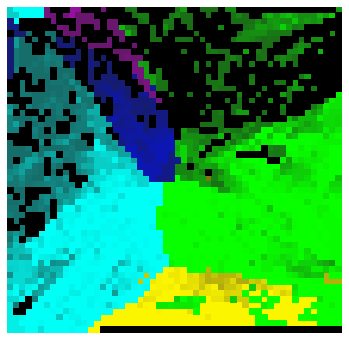

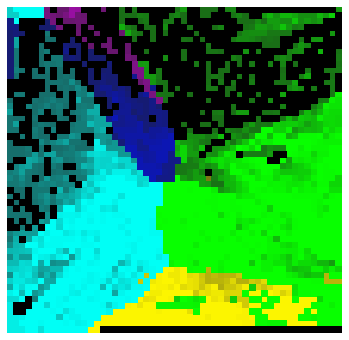

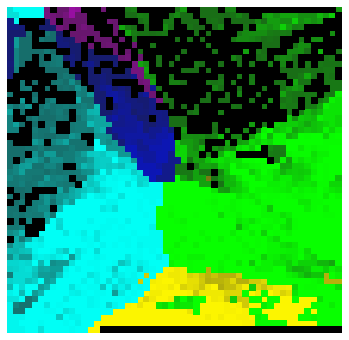

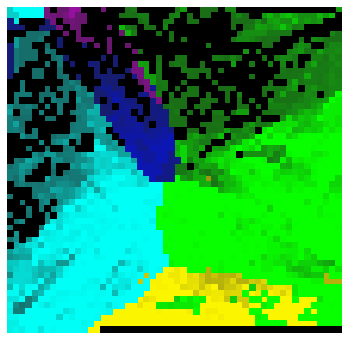

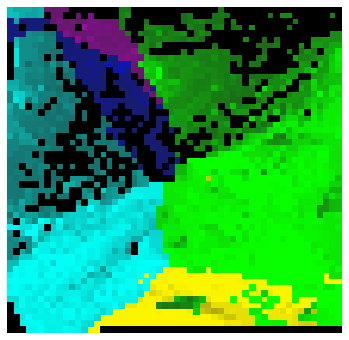

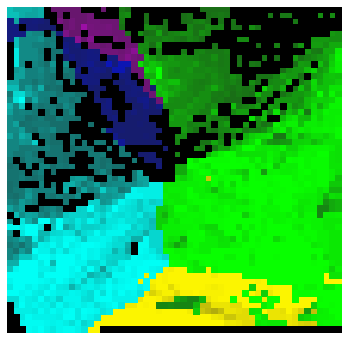

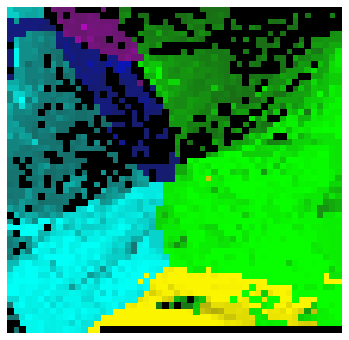

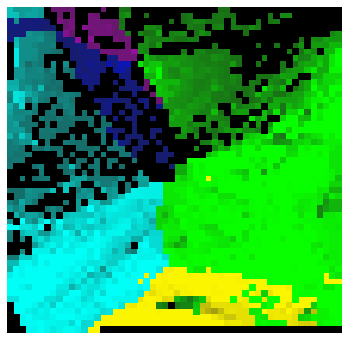

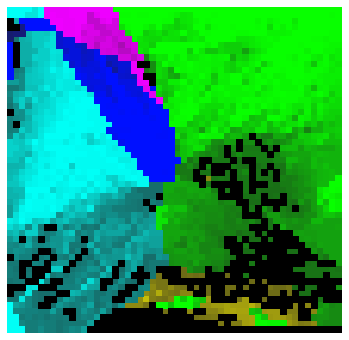

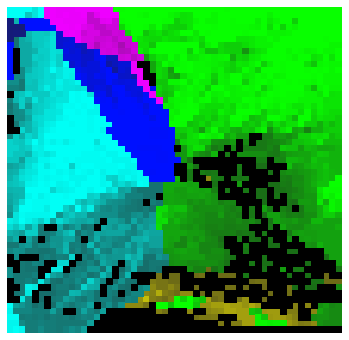

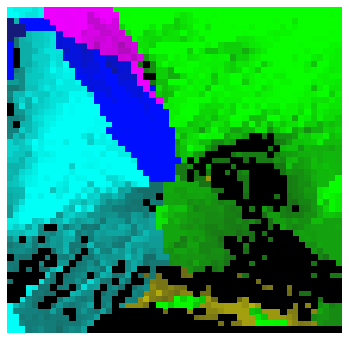

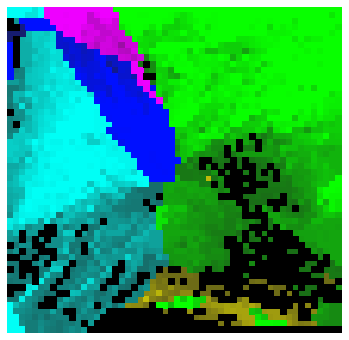

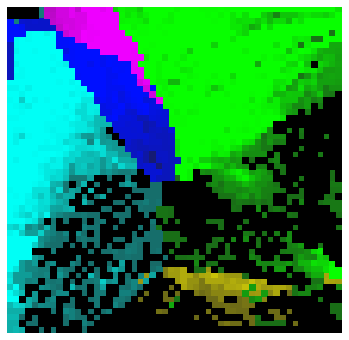

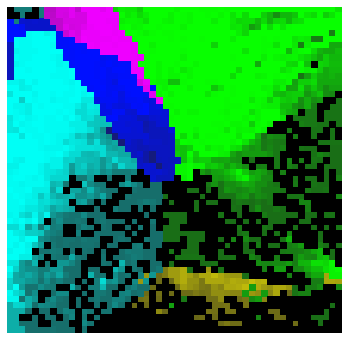

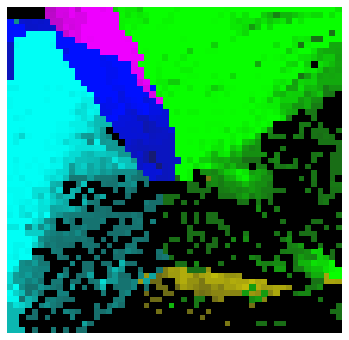

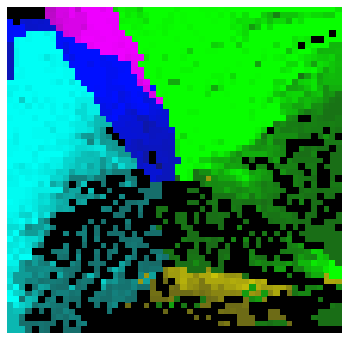

In [159]:
for x,name in zip(X,idx):

    fig, ax = plt.subplots(figsize=(6,6))
    show.imshow(x, ax=ax, color_list=mp.bitsinfo.colors.unique(), mode = 'dark', x_max=1, vmin = -0.5)
    #ax.imshow(x.sum(axis=-1), cmap='jet', vmax=1.1)
    fig.savefig('./image/%s.png' % name, dpi=350, bbox_inches='tight')

In [148]:
mp.plot_scatter()

2021-04-27 18:11:16,513 - INFO - [bidd-molmap] - generate file: ./feature points_2877_cosine_umap_scatter
2021-04-27 18:11:16,548 - INFO - [bidd-molmap] - save html file to ./feature points_2877_cosine_umap_scatter
